In [1]:
import tensorflow as tf 
import numpy as np 

In [2]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

In [3]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True


In [4]:
import tensorflow as tf
import numpy as np

my_callback = MyThresholdCallback(threshold=0.005)
kernel_init = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)


# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights = []
final_weights = []
diff_weights = []

# Define the range of units in the first layer
unit_range = np.arange(300, 6005, 300)

for units in unit_range:
    # Define the model architecture
    print(f"Number of units: {units}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units, activation='relu', input_shape=(10,), kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer = kernel_init)
    ])

    # Print initial weights
    initial_weights.append(model.layers[0].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights.append(model.layers[0].get_weights()[0])
    diff_weights.append(final_weights[-1] - initial_weights[-1])


Number of units: 300


2023-05-05 16:04:58.950486: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Number of units: 600
Number of units: 900
Number of units: 1200
Number of units: 1500
Number of units: 1800
Number of units: 2100
Number of units: 2400
Number of units: 2700
Number of units: 3000
Number of units: 3300
Number of units: 3600
Number of units: 3900
Number of units: 4200
Number of units: 4500
Number of units: 4800
Number of units: 5100
Number of units: 5400
Number of units: 5700
Number of units: 6000


In [5]:
diff_avg = []
for i in range(len(unit_range)):
    diff_weights_flat = np.ndarray.flatten(diff_weights[i])
    diff_weights_flat = np.abs(diff_weights_flat)
    diff_avg.append(np.average(diff_weights_flat))

In [ ]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
initial_weights_ml_3 = []
final_weights_ml_3 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []
diff_weights_ml_3 = []



# Define the range of units in the first layer
unit_range = np.arange(300, 6005, 300)

for units in unit_range:
    # Define the model architecture
    print(f"Layer neurons: {int(units / 3)}, {int(units / 3)}, {int(units / 3)}")
    print(f"Number of layers: 3")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units / 3, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units = units / 3, activation = 'relu'),
        tf.keras.layers.Dense(units = units / 3, activation = 'relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Print initial weights
    initial_weights_ml_1.append(model.layers[0].get_weights()[0])
    initial_weights_ml_2.append(model.layers[1].get_weights()[0])
    initial_weights_ml_3.append(model.layers[2].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights_ml_1.append(model.layers[0].get_weights()[0])
    final_weights_ml_2.append(model.layers[1].get_weights()[0])
    final_weights_ml_3.append(model.layers[2].get_weights()[0])

    diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
    diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])
    diff_weights_ml_3.append(final_weights_ml_3[-1] - initial_weights_ml_3[-1])



Layer neurons: 100, 100, 100
Number of layers: 3
Layer neurons: 200, 200, 200
Number of layers: 3
Layer neurons: 300, 300, 300
Number of layers: 3
Layer neurons: 400, 400, 400
Number of layers: 3
Layer neurons: 500, 500, 500
Number of layers: 3
Layer neurons: 600, 600, 600
Number of layers: 3
Layer neurons: 700, 700, 700
Number of layers: 3
Layer neurons: 800, 800, 800
Number of layers: 3
Layer neurons: 900, 900, 900
Number of layers: 3
Layer neurons: 1000, 1000, 1000
Number of layers: 3
Layer neurons: 1100, 1100, 1100
Number of layers: 3
Layer neurons: 1200, 1200, 1200
Number of layers: 3
Layer neurons: 1300, 1300, 1300
Number of layers: 3
Layer neurons: 1400, 1400, 1400
Number of layers: 3
Layer neurons: 1500, 1500, 1500
Number of layers: 3
Layer neurons: 1600, 1600, 1600
Number of layers: 3
Layer neurons: 1700, 1700, 1700
Number of layers: 3
Layer neurons: 1800, 1800, 1800
Number of layers: 3
Layer neurons: 1900, 1900, 1900
Number of layers: 3
Layer neurons: 2000, 2000, 2000
Number 

In [ ]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []
diff_avg_ml_3 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

for i in range(len(unit_range)):
    diff_weights_flat_ml_3 = np.ndarray.flatten(diff_weights_ml_3[i])
    diff_weights_flat_ml_3 = np.abs(diff_weights_flat_ml_3)
    diff_avg_ml_3.append(np.average(diff_weights_flat_ml_3))

diff_avg_ml_sum = []
for i in range(len(unit_range)):
    diff_avg_ml_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i] + diff_avg_ml_3[i])

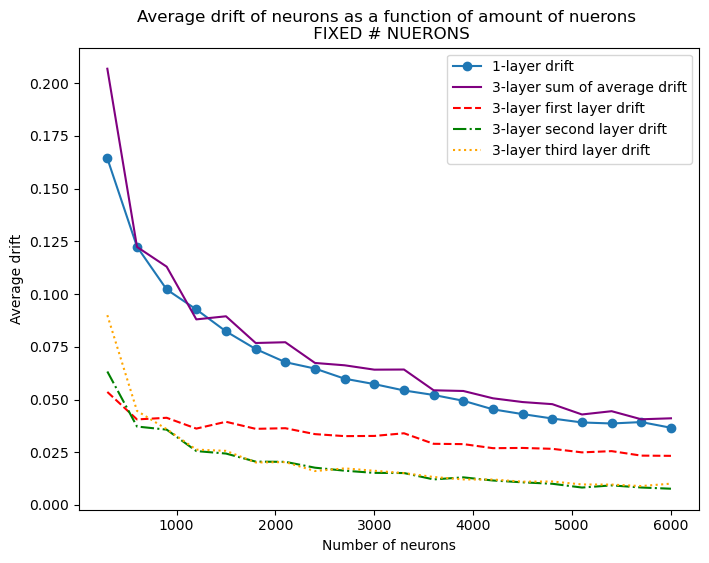

In [19]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line2, = ax.plot(unit_range, diff_avg_ml_sum, linestyle = '-', color = 'purple', label = '3-layer sum of average drift')
line3, = ax.plot(unit_range, diff_avg_ml_1, linestyle = '--', color = 'red', label = '3-layer first layer drift')
line4, = ax.plot(unit_range, diff_avg_ml_2, linestyle = '-.', color = 'green', label = '3-layer second layer drift')
line5, = ax.plot(unit_range, diff_avg_ml_3, linestyle = ':', color = 'orange', label = '3-layer third layer drift')



# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons \n FIXED # NUERONS')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()

In [12]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
initial_weights_ml_3 = []
final_weights_ml_3 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []
diff_weights_ml_3 = []



# Define the range of units in the first layer
unit_range = np.arange(300, 6005, 300)

for units in unit_range:
    # Define the model architecture
    print(f"Layer neurons: {int(units / 3)}, {int(units / 30)}, {int(units / 3)}")
    print(f"Number of layers: 3")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units / 3, activation='relu', input_shape=(10,), kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units = units / 30, activation = 'relu', kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units = units / 3, activation = 'relu', kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer = kernel_init)
    ])

    # Print initial weights
    initial_weights_ml_1.append(model.layers[0].get_weights()[0])
    initial_weights_ml_2.append(model.layers[1].get_weights()[0])
    initial_weights_ml_3.append(model.layers[2].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights_ml_1.append(model.layers[0].get_weights()[0])
    final_weights_ml_2.append(model.layers[1].get_weights()[0])
    final_weights_ml_3.append(model.layers[2].get_weights()[0])

    diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
    diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])
    diff_weights_ml_3.append(final_weights_ml_3[-1] - initial_weights_ml_3[-1])



Layer neurons: 100, 10, 100
Number of layers: 3
Layer neurons: 200, 20, 200
Number of layers: 3
Layer neurons: 300, 30, 300
Number of layers: 3
Layer neurons: 400, 40, 400
Number of layers: 3
Layer neurons: 500, 50, 500
Number of layers: 3
Layer neurons: 600, 60, 600
Number of layers: 3
Layer neurons: 700, 70, 700
Number of layers: 3
Layer neurons: 800, 80, 800
Number of layers: 3
Layer neurons: 900, 90, 900
Number of layers: 3
Layer neurons: 1000, 100, 1000
Number of layers: 3
Layer neurons: 1100, 110, 1100
Number of layers: 3
Layer neurons: 1200, 120, 1200
Number of layers: 3
Layer neurons: 1300, 130, 1300
Number of layers: 3
Layer neurons: 1400, 140, 1400
Number of layers: 3
Layer neurons: 1500, 150, 1500
Number of layers: 3
Layer neurons: 1600, 160, 1600
Number of layers: 3
Layer neurons: 1700, 170, 1700
Number of layers: 3
Layer neurons: 1800, 180, 1800
Number of layers: 3
Layer neurons: 1900, 190, 1900
Number of layers: 3
Layer neurons: 2000, 200, 2000
Number of layers: 3


In [13]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []
diff_avg_ml_3 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

for i in range(len(unit_range)):
    diff_weights_flat_ml_3 = np.ndarray.flatten(diff_weights_ml_3[i])
    diff_weights_flat_ml_3 = np.abs(diff_weights_flat_ml_3)
    diff_avg_ml_3.append(np.average(diff_weights_flat_ml_3))

diff_avg_3_sum = []
for i in range(len(unit_range)):
    diff_avg_3_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i] + diff_avg_ml_3[i])

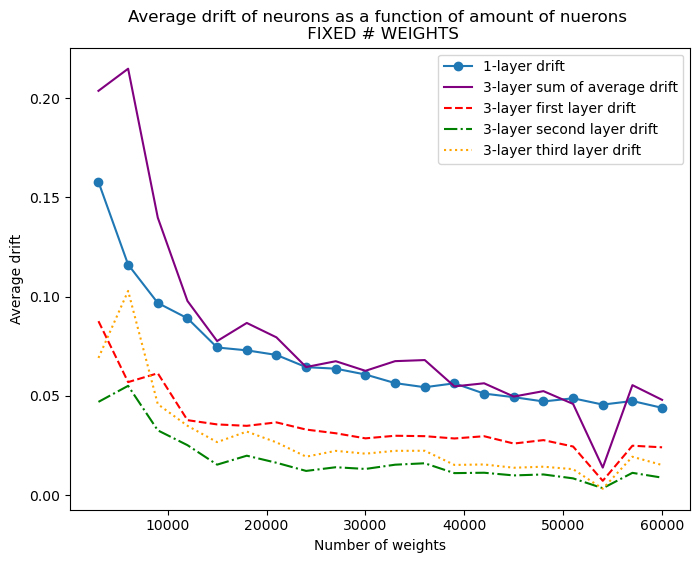

In [14]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(unit_range * 10, diff_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line2, = ax.plot(unit_range * 10, diff_avg_3_sum, linestyle = '-', color = 'purple', label = '3-layer sum of average drift')
line3, = ax.plot(unit_range * 10, diff_avg_ml_1, linestyle = '--', color = 'red', label = '3-layer first layer drift')
line4, = ax.plot(unit_range * 10, diff_avg_ml_2, linestyle = '-.', color = 'green', label = '3-layer second layer drift')
line5, = ax.plot(unit_range * 10, diff_avg_ml_3, linestyle = ':', color = 'orange', label = '3-layer third layer drift')



# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons \n FIXED # WEIGHTS')
ax.set_xlabel('Number of weights')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()

In [9]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []

# Define the range of units in the first layer
unit_range = np.arange(300, 6005, 300)

for units in unit_range:
    # Define the model architecture
    print(f"Layer neurons: {int(units / 2)}, {int(units / 20)}")
    print(f"Number of layers: 2")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units / 2, activation='relu', input_shape=(10,), kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units = units / 20, activation = 'relu', kernel_initializer = kernel_init),
        tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer = kernel_init)
    ])

    # Print initial weights
    initial_weights_ml_1.append(model.layers[0].get_weights()[0])
    initial_weights_ml_2.append(model.layers[1].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights_ml_1.append(model.layers[0].get_weights()[0])
    final_weights_ml_2.append(model.layers[1].get_weights()[0])

    diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
    diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])


Layer neurons: 150, 15
Number of layers: 2
Layer neurons: 300, 30
Number of layers: 2
Layer neurons: 450, 45
Number of layers: 2
Layer neurons: 600, 60
Number of layers: 2
Layer neurons: 750, 75
Number of layers: 2
Layer neurons: 900, 90
Number of layers: 2
Layer neurons: 1050, 105
Number of layers: 2
Layer neurons: 1200, 120
Number of layers: 2
Layer neurons: 1350, 135
Number of layers: 2
Layer neurons: 1500, 150
Number of layers: 2
Layer neurons: 1650, 165
Number of layers: 2
Layer neurons: 1800, 180
Number of layers: 2
Layer neurons: 1950, 195
Number of layers: 2
Layer neurons: 2100, 210
Number of layers: 2
Layer neurons: 2250, 225
Number of layers: 2
Layer neurons: 2400, 240
Number of layers: 2
Layer neurons: 2550, 255
Number of layers: 2
Layer neurons: 2700, 270
Number of layers: 2
Layer neurons: 2850, 285
Number of layers: 2
Layer neurons: 3000, 300
Number of layers: 2


In [10]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

diff_avg_2_sum = []
for i in range(len(unit_range)):
    diff_avg_2_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i])

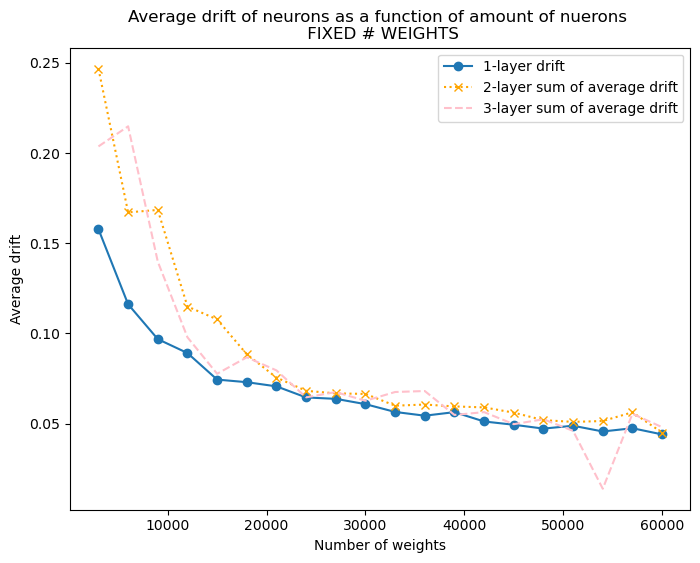

In [18]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(unit_range * 10, diff_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line3, = ax.plot(unit_range * 10, diff_avg_2_sum, linestyle = ':', marker = 'x', color = 'orange',label = '2-layer sum of average drift')
line2, = ax.plot(unit_range * 10, diff_avg_3_sum, linestyle = '--', color = 'pink', label = '3-layer sum of average drift')



# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons \n FIXED # WEIGHTS')
ax.set_xlabel('Number of weights')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()